# ACADEMIC INTERGITY STATEMENT
"I certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I (we) did not receive 
any external help, coaching or contributions during the production of this work."

# Part II: Optimizing NN 

In [1]:
import statistics as st
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# step 3 read csv file
incomeD = pd.read_table('income_dataset.csv',sep=',')
    # drop the nan
incomeD = incomeD.dropna()
incomeD.drop(incomeD[incomeD['workclass'] == "?"].index, inplace = True)
incomeD.drop(incomeD[incomeD['occupation'] == "?"].index, inplace = True)
incomeD.drop(incomeD[incomeD['native.country'] == "?"].index, inplace = True)
dataD = incomeD
dataD['workclass'] = dataD.workclass.astype('category')
dataD['education'] = dataD.education.astype('category')
dataD['marital.status'] = dataD['marital.status'].astype('category')
dataD['occupation'] = dataD.occupation.astype('category')
dataD['native.country'] =dataD['native.country'].astype('category')
dataD['relationship'] = dataD.relationship.astype(('category'))

dataD['workclass'] = pd.factorize(dataD['workclass'])[0] + 1
dataD['education'] = pd.factorize(dataD['education'])[0] + 1
dataD['marital.status'] = pd.factorize(dataD['marital.status'])[0] + 1
dataD['occupation'] = pd.factorize(dataD['occupation'])[0] + 1
dataD['native.country'] = pd.factorize(dataD['native.country'])[0] + 1
dataD['relationship'] = pd.factorize(dataD['relationship'])[0] + 1
dataD['income'] = dataD['income'].replace('<=50K', 0).replace('>50K', 1)


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
dataD['workclass'] = NormalizeData(dataD['workclass'])
dataD['age'] = NormalizeData(dataD['age'])
dataD['fnlwgt'] = NormalizeData(dataD['fnlwgt'])
dataD['education'] = NormalizeData(dataD['education'] )
dataD['education.num'] = NormalizeData(dataD['education.num'])
dataD['marital.status'] = NormalizeData(dataD['marital.status'])
dataD['occupation'] = NormalizeData(dataD['occupation'])
dataD['relationship'] = NormalizeData(dataD['relationship'])
dataD['capital.gain'] = NormalizeData(dataD['capital.gain'])
dataD['capital.loss'] = NormalizeData(dataD['capital.loss'])
dataD['hours.per.week'] = NormalizeData(dataD['hours.per.week'])
dataD['native.country'] = NormalizeData(dataD['native.country'])

In [3]:
# 80% training and 20% testing
sample80 = dataD.sample(frac=0.8,random_state=12345)
sample20 = dataD.drop(sample80.index)

X_train = sample80.iloc[:,:12]
Y_train = sample80.iloc[:,12:13]
X_test = sample20.iloc[:,:12]
Y_test = sample20.iloc[:,12:13]
#
X = dataD.iloc[:,:12]
Y = dataD.iloc[:,12:13]

print("X_train Y_train X_test Y_test")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train Y_train X_test Y_test
(24130, 12) (24130, 1) (6032, 12) (6032, 1)


Epoch 1/20
1931/1931 [==============================] - 9s 4ms/step - loss: 0.5220 - accuracy: 0.7550 - val_loss: 0.4326 - val_accuracy: 0.7781
Epoch 2/20
1931/1931 [==============================] - 7s 3ms/step - loss: 0.4220 - accuracy: 0.8011 - val_loss: 0.3850 - val_accuracy: 0.8247
Epoch 3/20
1931/1931 [==============================] - 7s 3ms/step - loss: 0.4026 - accuracy: 0.8120 - val_loss: 0.3723 - val_accuracy: 0.8291
Epoch 4/20
1931/1931 [==============================] - 6s 3ms/step - loss: 0.3913 - accuracy: 0.8185 - val_loss: 0.3628 - val_accuracy: 0.8307
Epoch 5/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3799 - accuracy: 0.8230 - val_loss: 0.3574 - val_accuracy: 0.8351
Epoch 6/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3734 - accuracy: 0.8275 - val_loss: 0.3524 - val_accuracy: 0.8324
Epoch 7/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8281 - val_loss: 0.3501 - val_accuracy:

1931/1931 [==============================] - 6s 3ms/step - loss: 0.3585 - accuracy: 0.8341 - val_loss: 0.3418 - val_accuracy: 0.8386
Epoch 18/20
1931/1931 [==============================] - 7s 4ms/step - loss: 0.3593 - accuracy: 0.8332 - val_loss: 0.3421 - val_accuracy: 0.8382
Epoch 19/20
1931/1931 [==============================] - 9s 4ms/step - loss: 0.3580 - accuracy: 0.8354 - val_loss: 0.3403 - val_accuracy: 0.8386
Epoch 20/20
1931/1931 [==============================] - 7s 4ms/step - loss: 0.3554 - accuracy: 0.8356 - val_loss: 0.3392 - val_accuracy: 0.8392


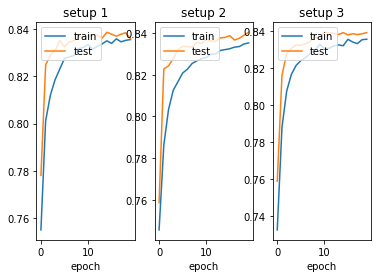

In [4]:
# setup 1-3

def setup(act,ini,opt,drop):
    model = Sequential()
    model.add(Dense(60, input_dim = 12, activation=act,kernel_initializer=ini))
    model.add(Dropout(drop))
    model.add(Dense(10, activation=act,kernel_initializer=ini)) 
    model.add(Dropout(drop))
    model.add(Dense(1, activation=act))
    #loss
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=opt,metrics=['accuracy'],)
    history = model.fit(X_train, Y_train,validation_split=0.2, epochs=20, batch_size=10) #print accuracy
    return history

# summarize history for accuracy
act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
history1 = setup(act,ini,opt,drop)
drop = 0.2
history2 = setup(act,ini,opt,drop)
drop = 0.15
history3 = setup(act,ini,opt,drop)


plt.subplot(131)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('setup 1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('setup 2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('setup 3')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
1931/1931 [==============================] - 7s 3ms/step - loss: 0.5294 - accuracy: 0.7511 - val_loss: 0.4519 - val_accuracy: 0.7634
Epoch 2/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.4342 - accuracy: 0.7944 - val_loss: 0.3920 - val_accuracy: 0.8226
Epoch 3/20
1931/1931 [==============================] - 10s 5ms/step - loss: 0.4061 - accuracy: 0.8109 - val_loss: 0.3758 - val_accuracy: 0.8264
Epoch 4/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3915 - accuracy: 0.8182 - val_loss: 0.3666 - val_accuracy: 0.8311
Epoch 5/20
1931/1931 [==============================] - 11s 5ms/step - loss: 0.3832 - accuracy: 0.8224 - val_loss: 0.3617 - val_accuracy: 0.8324
Epoch 6/20
1931/1931 [==============================] - 10s 5ms/step - loss: 0.3759 - accuracy: 0.8287 - val_loss: 0.3566 - val_accuracy: 0.8346
Epoch 7/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3713 - accuracy: 0.8284 - val_loss: 0.3533 - val_accura

1931/1931 [==============================] - 8s 4ms/step - loss: 0.5640 - accuracy: 0.7515 - val_loss: 0.5548 - val_accuracy: 0.7557
Epoch 18/20
1931/1931 [==============================] - 7s 4ms/step - loss: 0.5645 - accuracy: 0.7510 - val_loss: 0.5547 - val_accuracy: 0.7557
Epoch 19/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.5654 - accuracy: 0.7516 - val_loss: 0.5547 - val_accuracy: 0.7557
Epoch 20/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.5658 - accuracy: 0.7516 - val_loss: 0.5546 - val_accuracy: 0.7557


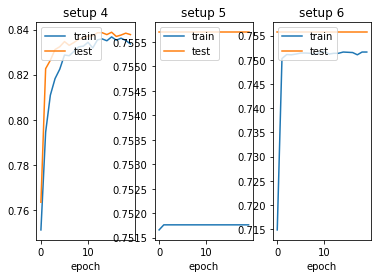

In [5]:

# summarize history for accuracy

# summarize history for accuracy
act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
history1 = setup(act,ini,opt,drop)
opt = 'SGD'
history2 = setup(act,ini,opt,drop)
opt = 'Adagrad'
history3 = setup(act,ini,opt,drop)


plt.subplot(131)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('setup 4')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('setup 5')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('setup 6')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
1931/1931 [==============================] - 8s 3ms/step - loss: 0.4998 - accuracy: 0.7637 - val_loss: 0.4054 - val_accuracy: 0.8166
Epoch 2/20
1931/1931 [==============================] - 10s 5ms/step - loss: 0.4123 - accuracy: 0.8048 - val_loss: 0.3776 - val_accuracy: 0.8270
Epoch 3/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3950 - accuracy: 0.8158 - val_loss: 0.3642 - val_accuracy: 0.8305
Epoch 4/20
1931/1931 [==============================] - 9s 4ms/step - loss: 0.3821 - accuracy: 0.8218 - val_loss: 0.3593 - val_accuracy: 0.8344
Epoch 5/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3746 - accuracy: 0.8243 - val_loss: 0.3513 - val_accuracy: 0.8328
Epoch 6/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3714 - accuracy: 0.8285 - val_loss: 0.3480 - val_accuracy: 0.8351
Epoch 7/20
1931/1931 [==============================] - 10s 5ms/step - loss: 0.3668 - accuracy: 0.8314 - val_loss: 0.3502 - val_accurac

1931/1931 [==============================] - 8s 4ms/step - loss: 3.8291 - accuracy: 0.7518 - val_loss: 3.7683 - val_accuracy: 0.7557
Epoch 18/20
1931/1931 [==============================] - 7s 4ms/step - loss: 3.8291 - accuracy: 0.7518 - val_loss: 3.7683 - val_accuracy: 0.7557
Epoch 19/20
1931/1931 [==============================] - 7s 4ms/step - loss: 3.8291 - accuracy: 0.7518 - val_loss: 3.7683 - val_accuracy: 0.7557
Epoch 20/20
1931/1931 [==============================] - 7s 3ms/step - loss: 3.8291 - accuracy: 0.7518 - val_loss: 3.7683 - val_accuracy: 0.7557


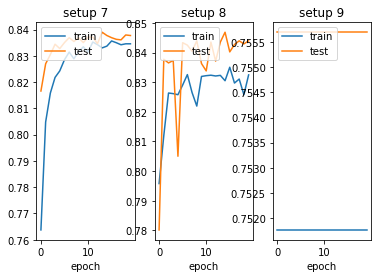

In [6]:

# summarize history for accuracy
act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
history1 = setup(act,ini,opt,drop)
act = 'relu'
history2 = setup(act,ini,opt,drop)
act = 'tanh'
history3 = setup(act,ini,opt,drop)


plt.subplot(131)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('setup 7')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('setup 8')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('setup 9')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
1931/1931 [==============================] - 9s 4ms/step - loss: 0.5214 - accuracy: 0.7554 - val_loss: 0.4337 - val_accuracy: 0.7799
Epoch 2/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.4260 - accuracy: 0.7991 - val_loss: 0.3860 - val_accuracy: 0.8245
Epoch 3/20
1931/1931 [==============================] - 7s 4ms/step - loss: 0.4024 - accuracy: 0.8122 - val_loss: 0.3729 - val_accuracy: 0.8276
Epoch 4/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3907 - accuracy: 0.8188 - val_loss: 0.3640 - val_accuracy: 0.8313
Epoch 5/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3825 - accuracy: 0.8234 - val_loss: 0.3596 - val_accuracy: 0.8336
Epoch 6/20
1931/1931 [==============================] - 8s 4ms/step - loss: 0.3771 - accuracy: 0.8232 - val_loss: 0.3561 - val_accuracy: 0.8317
Epoch 7/20
1931/1931 [==============================] - 9s 5ms/step - loss: 0.3704 - accuracy: 0.8314 - val_loss: 0.3509 - val_accuracy:

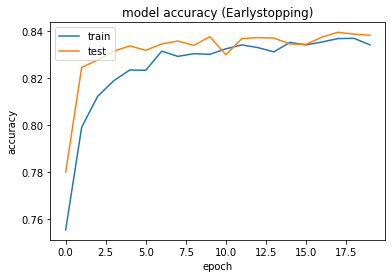

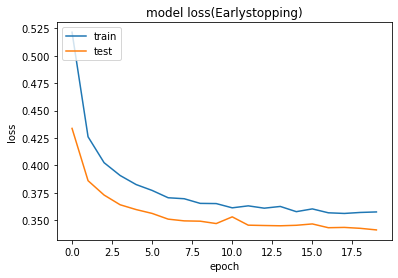

In [8]:
# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# fit the keras model on the dataset
act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1

historye = setup(act,ini,opt,drop)

# summarize history for accuracy
plt.plot(historye.history['accuracy'])
plt.plot(historye.history['val_accuracy'])
plt.title('model accuracy (Earlystopping)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historye.history['loss'])
plt.plot(historye.history['val_loss'])
plt.title('model loss(Earlystopping)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
1509/1509 [==============================] - 10s 6ms/step - loss: 0.5330 - accuracy: 0.7515 - val_loss: 0.4521 - val_accuracy: 0.7777
Epoch 2/20
1509/1509 [==============================] - 10s 6ms/step - loss: 0.4360 - accuracy: 0.7946 - val_loss: 0.3972 - val_accuracy: 0.8203
Epoch 3/20
1509/1509 [==============================] - 9s 6ms/step - loss: 0.4122 - accuracy: 0.8048 - val_loss: 0.3820 - val_accuracy: 0.8282
Epoch 4/20
1509/1509 [==============================] - 9s 6ms/step - loss: 0.4032 - accuracy: 0.8110 - val_loss: 0.3736 - val_accuracy: 0.8305
Epoch 5/20
1509/1509 [==============================] - 9s 6ms/step - loss: 0.3964 - accuracy: 0.8149 - val_loss: 0.3669 - val_accuracy: 0.8343
Epoch 6/20
1509/1509 [==============================] - 9s 6ms/step - loss: 0.3880 - accuracy: 0.8206 - val_loss: 0.3609 - val_accuracy: 0.8359
Epoch 7/20
1509/1509 [==============================] - 9s 6ms/step - loss: 0.3845 - accuracy: 0.8214 - val_loss: 0.3573 - val_accurac

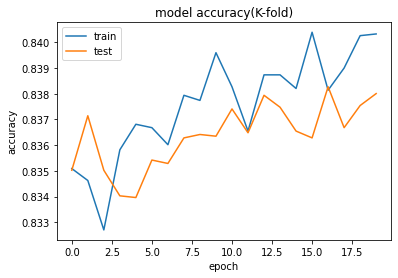

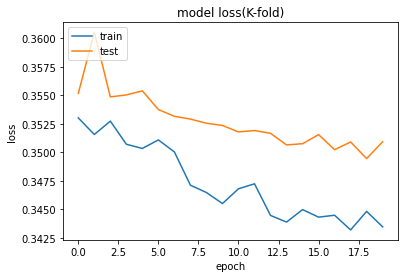

In [9]:
#K-fold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
model = Sequential()
model.add(Dense(60, input_dim = 12, activation=act,kernel_initializer=ini))
model.add(Dropout(drop))
model.add(Dense(10, activation=act,kernel_initializer=ini))  
model.add(Dropout(drop))
model.add(Dense(1, activation=act))

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=opt,metrics=['accuracy'],)
    historyk = model.fit(inputs[train],targets[train], epochs=20, batch_size=10, validation_data=(inputs[test],targets[test]))

# summarize history for accuracy
plt.plot(historyk.history['accuracy'])
plt.plot(historyk.history['val_accuracy'])
plt.title('model accuracy(K-fold)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyk.history['loss'])
plt.plot(historyk.history['val_loss'])
plt.title('model loss(K-fold)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#  shufflesplit
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=3, test_size=.2, random_state=0)

act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
model = Sequential()
model.add(Dense(60, input_dim = 12, activation=act,kernel_initializer=ini))
model.add(Dropout(drop))
model.add(Dense(10, activation=act,kernel_initializer=ini))  
model.add(Dropout(drop))
model.add(Dense(1, activation=act))

for train, test in rs.split(X):
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=opt,metrics=['accuracy'],)
    historyh = model.fit(inputs[train],targets[train], epochs=20, batch_size=10, validation_data=(inputs[test],targets[test]))






Epoch 1/20
2413/2413 [==============================] - 5s 2ms/step - loss: 0.5030 - accuracy: 0.7635 - val_loss: 0.4195 - val_accuracy: 0.7984
Epoch 2/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.4117 - accuracy: 0.8089 - val_loss: 0.3890 - val_accuracy: 0.8236
Epoch 3/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8146 - val_loss: 0.3770 - val_accuracy: 0.8265
Epoch 4/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3841 - accuracy: 0.8215 - val_loss: 0.3670 - val_accuracy: 0.8313
Epoch 5/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.3752 - accuracy: 0.8256 - val_loss: 0.3618 - val_accuracy: 0.8333
Epoch 6/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3704 - accuracy: 0.8288 - val_loss: 0.3582 - val_accuracy: 0.8333
Epoch 7/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3674 - accuracy: 0.8285 - val_loss: 0.3554 - val_accuracy:

Epoch 18/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8417 - val_loss: 0.3352 - val_accuracy: 0.8425
Epoch 19/20
2413/2413 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8421 - val_loss: 0.3362 - val_accuracy: 0.8422
Epoch 20/20
2413/2413 [==============================] - 4s 1ms/step - loss: 0.3398 - accuracy: 0.8425 - val_loss: 0.3346 - val_accuracy: 0.8410


NameError: name 'historysh' is not defined

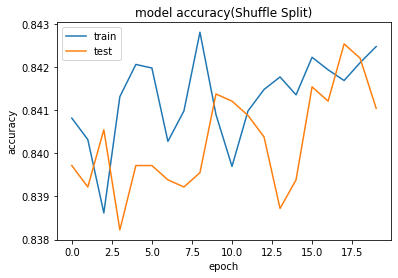

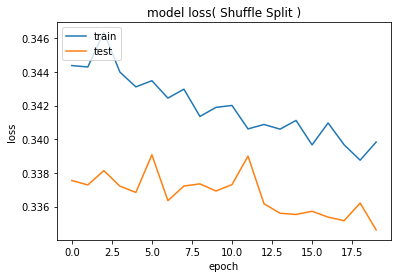

In [12]:
# summarize history for accuracy
plt.plot(historyh.history['accuracy'])
plt.plot(historyh.history['val_accuracy'])
plt.title('model accuracy(Shuffle Split)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyh.history['loss'])
plt.plot(historyh.history['val_loss'])
plt.title('model loss( Shuffle Split )')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Stratified k-fold
from sklearn.model_selection import StratifiedKFold, KFold
kf = KFold(n_splits=3)
skf = StratifiedKFold(n_splits=3)

act = 'sigmoid'
ini = 'uniform'
opt = 'adam'
drop = 0.1
model = Sequential()
model.add(Dense(60, input_dim = 12, activation=act,kernel_initializer=ini))
model.add(Dropout(drop))
model.add(Dense(10, activation=act,kernel_initializer=ini))  
model.add(Dropout(drop))
model.add(Dense(1, activation=act))

for train, test in skf.split(inputs, targets):
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=opt,metrics=['accuracy'],)
    historsk = model.fit(inputs[train],targets[train], epochs=20, batch_size=10, validation_data=(inputs[test],targets[test]))
    
    

Epoch 1/20
2011/2011 [==============================] - 4s 2ms/step - loss: 0.5249 - accuracy: 0.7521 - val_loss: 0.4495 - val_accuracy: 0.7730
Epoch 2/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.4270 - accuracy: 0.8005 - val_loss: 0.3987 - val_accuracy: 0.8205
Epoch 3/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8122 - val_loss: 0.3847 - val_accuracy: 0.8251
Epoch 4/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.8195 - val_loss: 0.3756 - val_accuracy: 0.8309
Epoch 5/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8224 - val_loss: 0.3677 - val_accuracy: 0.8351
Epoch 6/20
2011/2011 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8250 - val_loss: 0.3641 - val_accuracy: 0.8367
Epoch 7/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8253 - val_loss: 0.3592 - val_accuracy:

Epoch 18/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3413 - accuracy: 0.8408 - val_loss: 0.3387 - val_accuracy: 0.8406
Epoch 19/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8421 - val_loss: 0.3387 - val_accuracy: 0.8410
Epoch 20/20
2011/2011 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8411 - val_loss: 0.3386 - val_accuracy: 0.8410


NameError: name 'historysk' is not defined

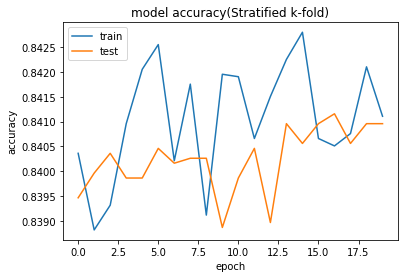

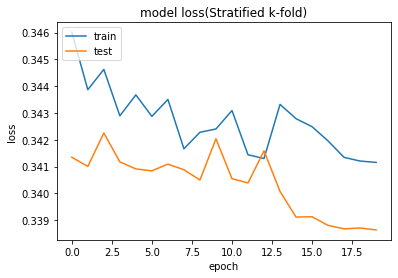

In [15]:

# summarize history for accuracy
plt.plot(historsk.history['accuracy'])
plt.plot(historsk.history['val_accuracy'])
plt.title('model accuracy(Stratified k-fold)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historsk.history['loss'])
plt.plot(historsk.history['val_loss'])
plt.title('model loss(Stratified k-fold)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()